In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error as MSE
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
10**9/34.78

28752156.411730878

In [3]:
consumo_gasolina = pd.read_csv('resumen_gasolinas.csv')

In [4]:
consumo_gasolina.columns
consumo_gasolina.dtypes
consumo_gasolina.shape

(28, 4)

In [5]:
consumo_gasolina.head(29)

,year,produccion,importacion,consumo
0,1990,929.894000,68.679000,908.869000
1,1991,961.897000,140.786000,972.306000
2,1992,910.830000,168.231000,975.078000
3,1993,935.893000,172.761000,990.515000
4,1994,967.448000,147.434000,1038.276000
5,1995,960.071000,137.335000,1014.252000
6,1996,954.214000,141.010000,1013.961000
7,1997,906.632000,243.098000,1008.476000
8,1998,959.828000,274.443000,1029.492000
9,1999,916.421000,195.507000,995.741000


In [6]:
consumo_gasolina['year'] = pd.to_datetime(consumo_gasolina.year, format='%Y')
consumo_gasolina['consumo_copy'] = consumo_gasolina['consumo']
consumo_gasolina['consumo_org'] = consumo_gasolina['consumo']*10**9/34.78
consumo_gasolina['consumo'] = consumo_gasolina['consumo']/np.sum(consumo_gasolina['consumo'].values)


In [7]:
consumo_gasolina.index = consumo_gasolina.year

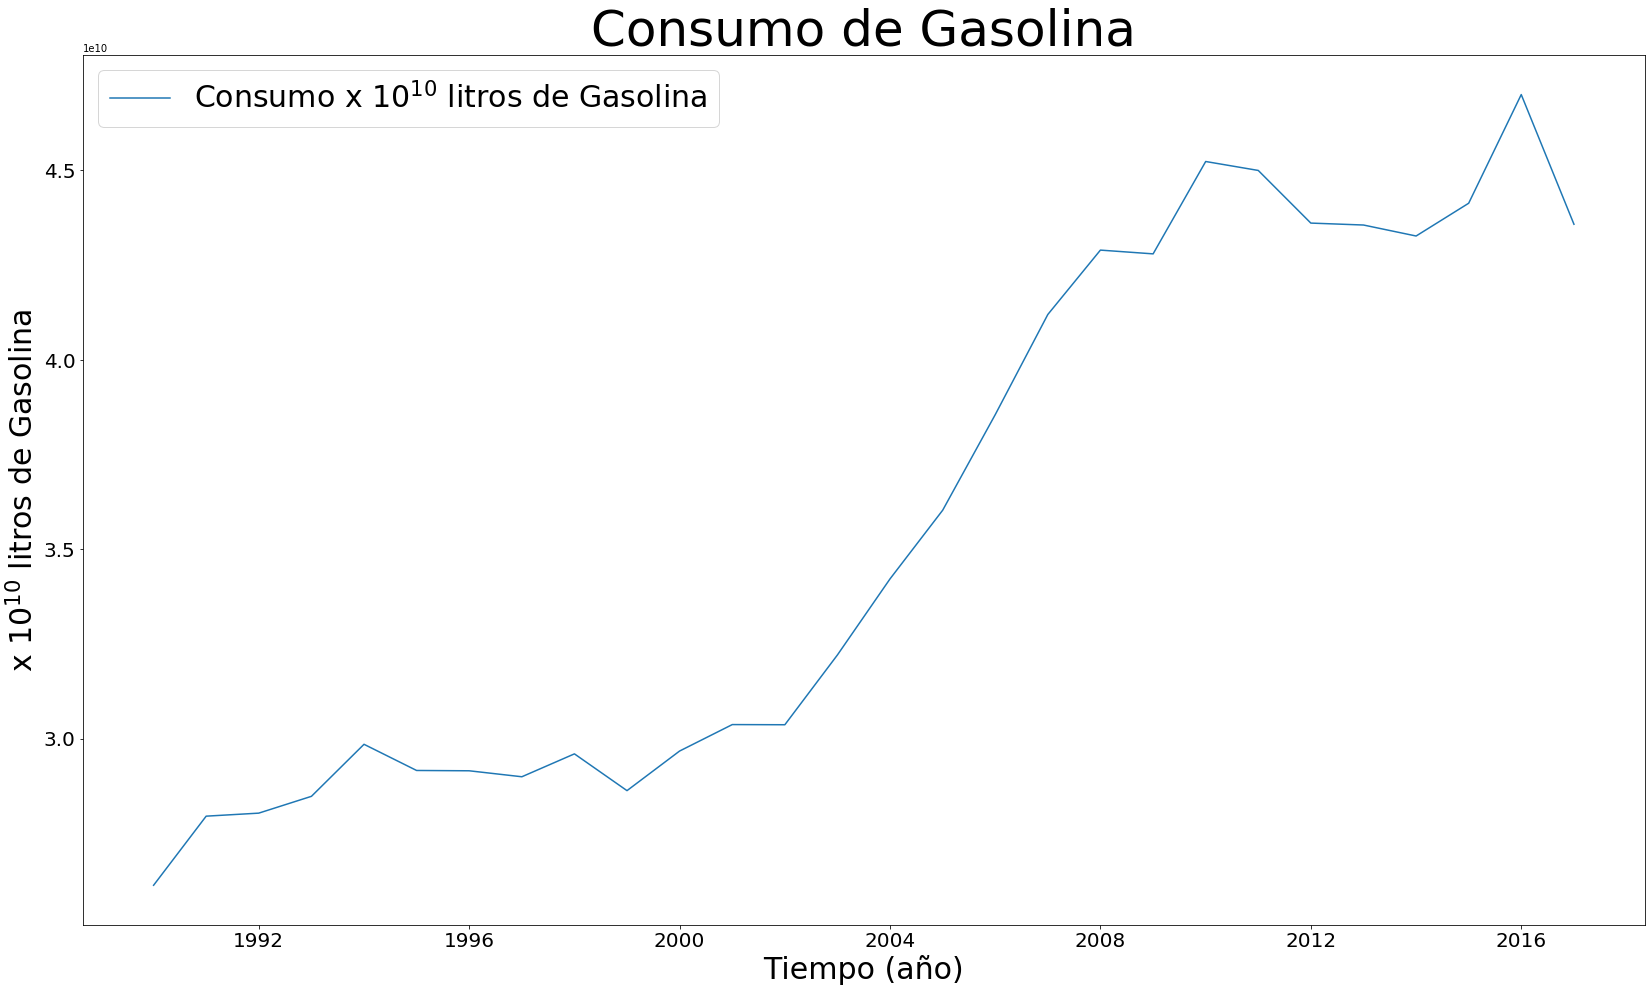

In [8]:
plt.figure(figsize = (28, 16))
plt.plot(consumo_gasolina.consumo_org, label='Consumo x $10^{10}$ litros de Gasolina')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Serie de tiempo',fontsize=30)
plt.xlabel('Tiempo (año)',fontsize=30)
plt.ylabel('x $10^{10}$ litros de Gasolina',fontsize=30)
plt.legend(loc='best',fontsize=30)
plt.title('Consumo de Gasolina',fontsize=50)
plt.show()

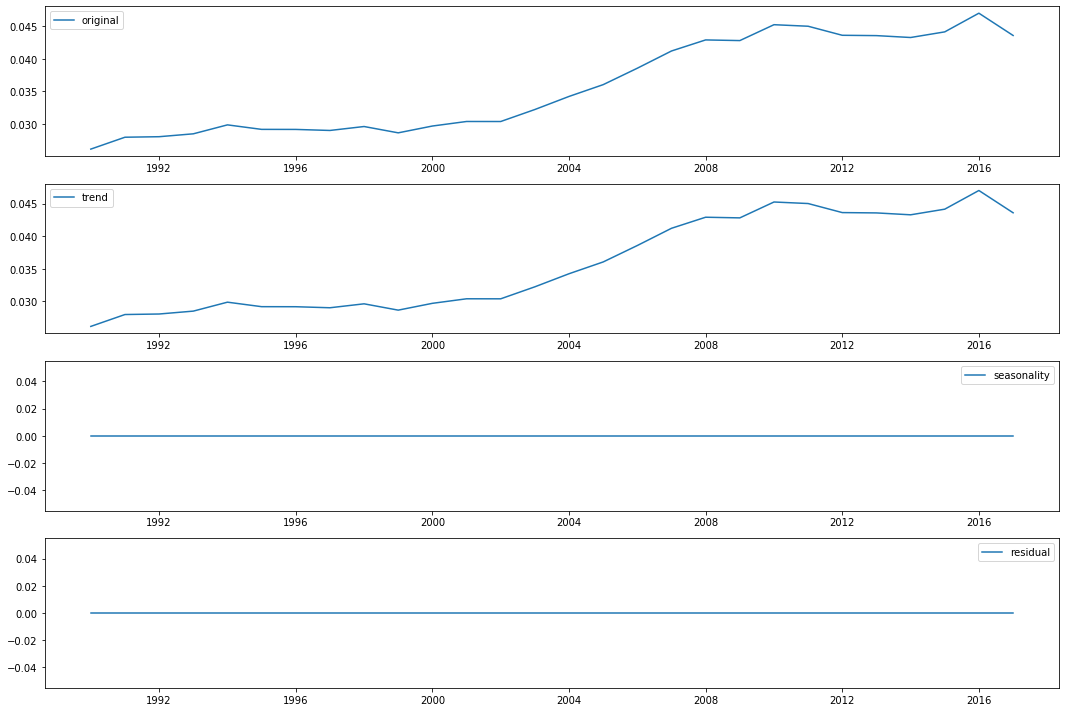

In [9]:
#descomposición estacionaria de la serie para la importación de gasolina
import statsmodels.api as sm
decompose = sm.tsa.seasonal_decompose(consumo_gasolina.consumo)

trend = decompose.trend
seasonality = decompose.seasonal
residual = decompose.resid

plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(consumo_gasolina.consumo, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonality, label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

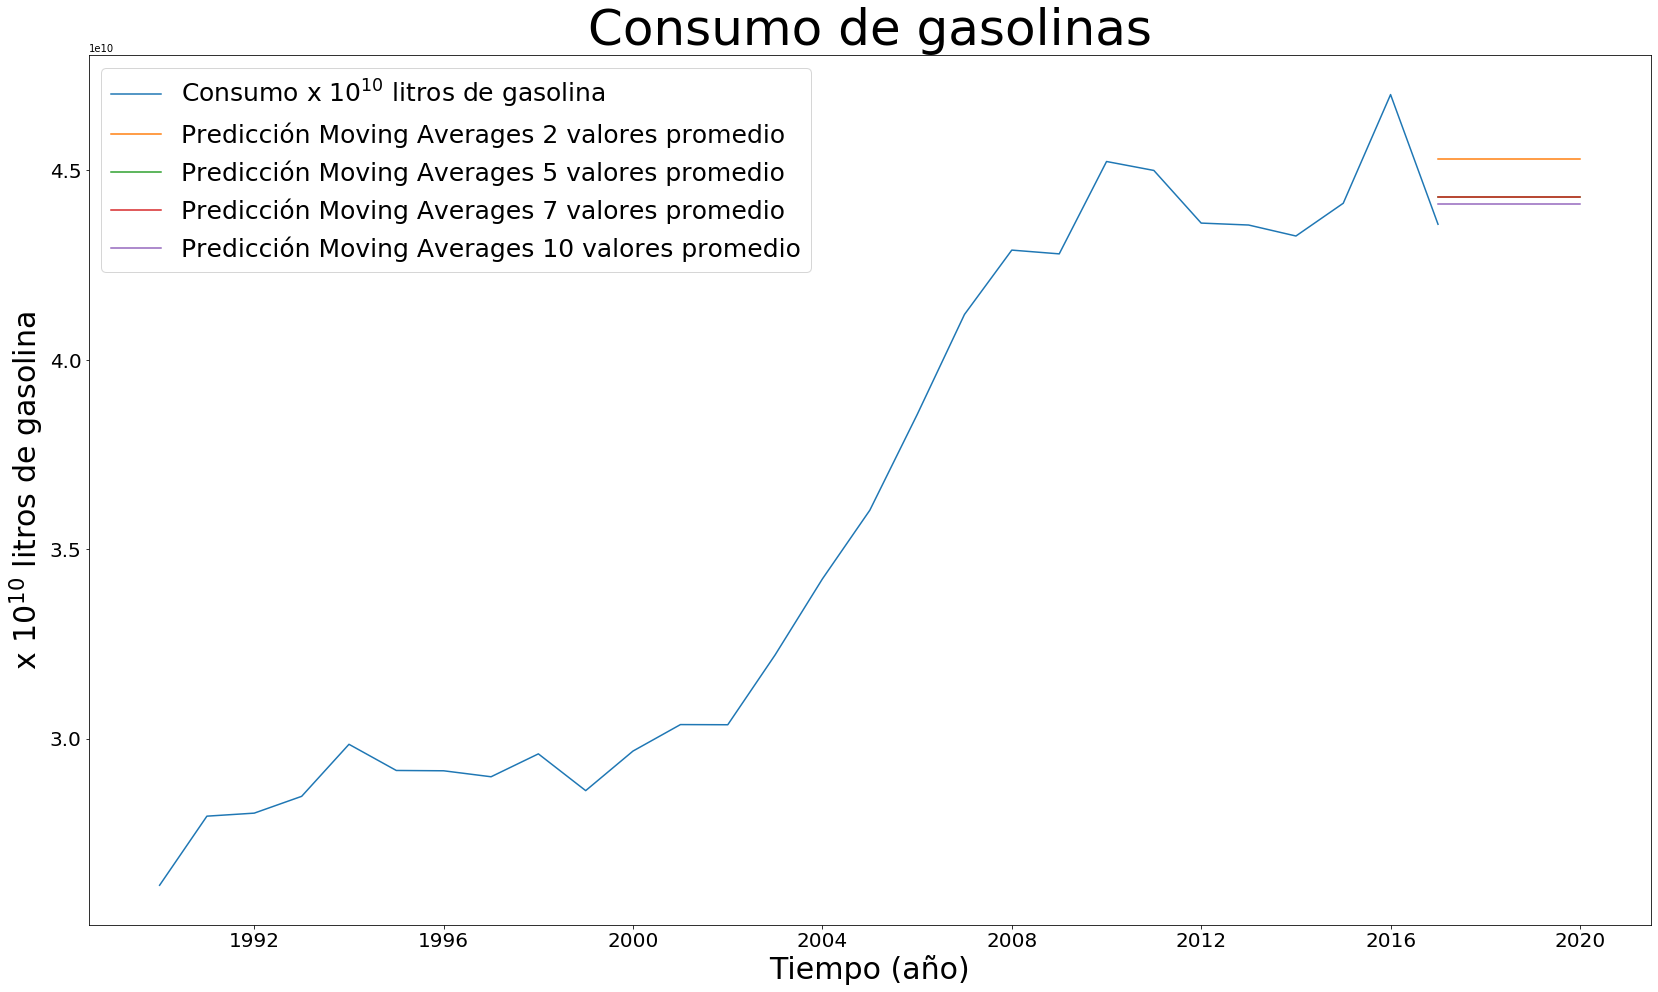

In [10]:
#Moving averages

def moving_avg(n):
    prediction_moving_avg = pd.DataFrame(np.ones(4)*consumo_gasolina.consumo_org.rolling(n).mean().iloc[-1])
    time_prediction =  pd.date_range('2017', '2020', freq='YS')
    prediction_moving_avg.index = time_prediction
    return prediction_moving_avg


plt.figure(figsize = (28, 16))
plt.plot(consumo_gasolina.consumo_org, label='Consumo x $10^{10}$ litros de gasolina')
plt.plot(moving_avg(2), label='Predicción Moving Averages 2 valores promedio'%(consumo_gasolina.consumo_org[-1]*10**-10))
plt.plot(moving_avg(5), label='Predicción Moving Averages 5 valores promedio'%(consumo_gasolina.consumo_org[-1]*10**-10))
plt.plot(moving_avg(7), label='Predicción Moving Averages 7 valores promedio'%(consumo_gasolina.consumo_org[-1]*10**-10))
plt.plot(moving_avg(10),label='Predicción Moving Averages 10 valores promedio'%(consumo_gasolina.consumo_org[-1]*10**-10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Serie de tiempo', fontsize=30)
plt.xlabel('Tiempo (año)', fontsize=30)
plt.ylabel('x $10^{10}$ litros de gasolina', fontsize=30)
plt.legend(loc='best', fontsize=25)
plt.title('Consumo de gasolinas', fontsize=50)
plt.show()


In [14]:
#haciendo la prueba de Dickey Fuller
print('Resultados de la prueba de Dickey Fuller:')
dftest = sm.tsa.stattools.adfuller(consumo_gasolina.consumo, autolag='AIC')
dfoutput = pd.Series(dftest[0: 4], index=['Test Statistic', 'p-value', '#Lags usados','Numero de observaciones usados'])
for key, value in dftest[4].items():
    dfoutput['Valor critico (%s)' %key] = value
print(dfoutput)

Resultados de la prueba de Dickey Fuller:
Test Statistic                    -0.802200
p-value                            0.818475
#Lags usados                       0.000000
Numero de observaciones usados    27.000000
Valor critico (1%)                -3.699608
Valor critico (5%)                -2.976430
Valor critico (10%)               -2.627601
dtype: float64


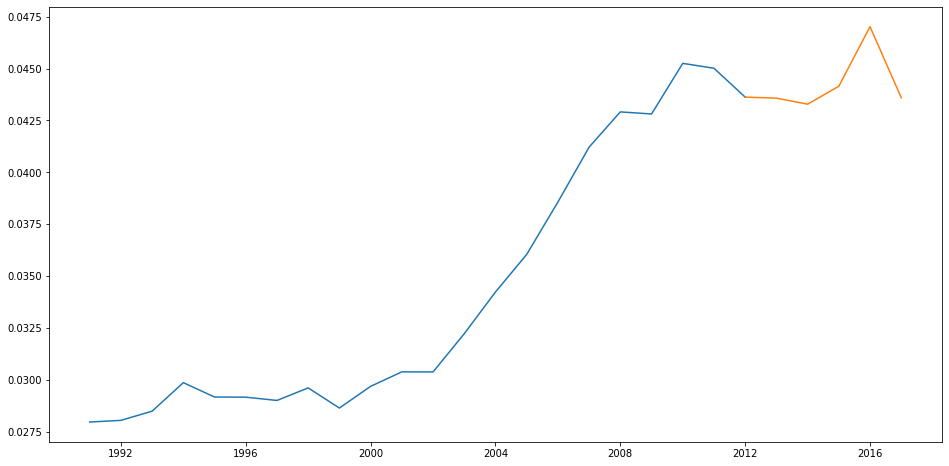

In [15]:
#lo primero que voy a hacer es usar Holt

train = consumo_gasolina.ix['1991':'2012']
valid = consumo_gasolina.ix['2012':'2017']

plt.figure(figsize=(16, 8))
plt.plot(train.consumo)
plt.plot(valid.consumo)
plt.show()

In [13]:
temp = []
l=100
for i in range(l):
    for j in range(l):
        fit1 = Holt(np.asarray(train.consumo)).fit(smoothing_level = i/l, smoothing_slope = j/l)
        valid['Holt_linear'] = fit1.forecast(len(valid))
        rms = np.sqrt(MSE(valid.consumo, valid.Holt_linear))
        temp.append([i/l, j/l, rms])
        
best = np.argmin(np.asarray(temp)[:, 2])
print(temp[best])

[0.99, 0.34, 0.00118955668887876]


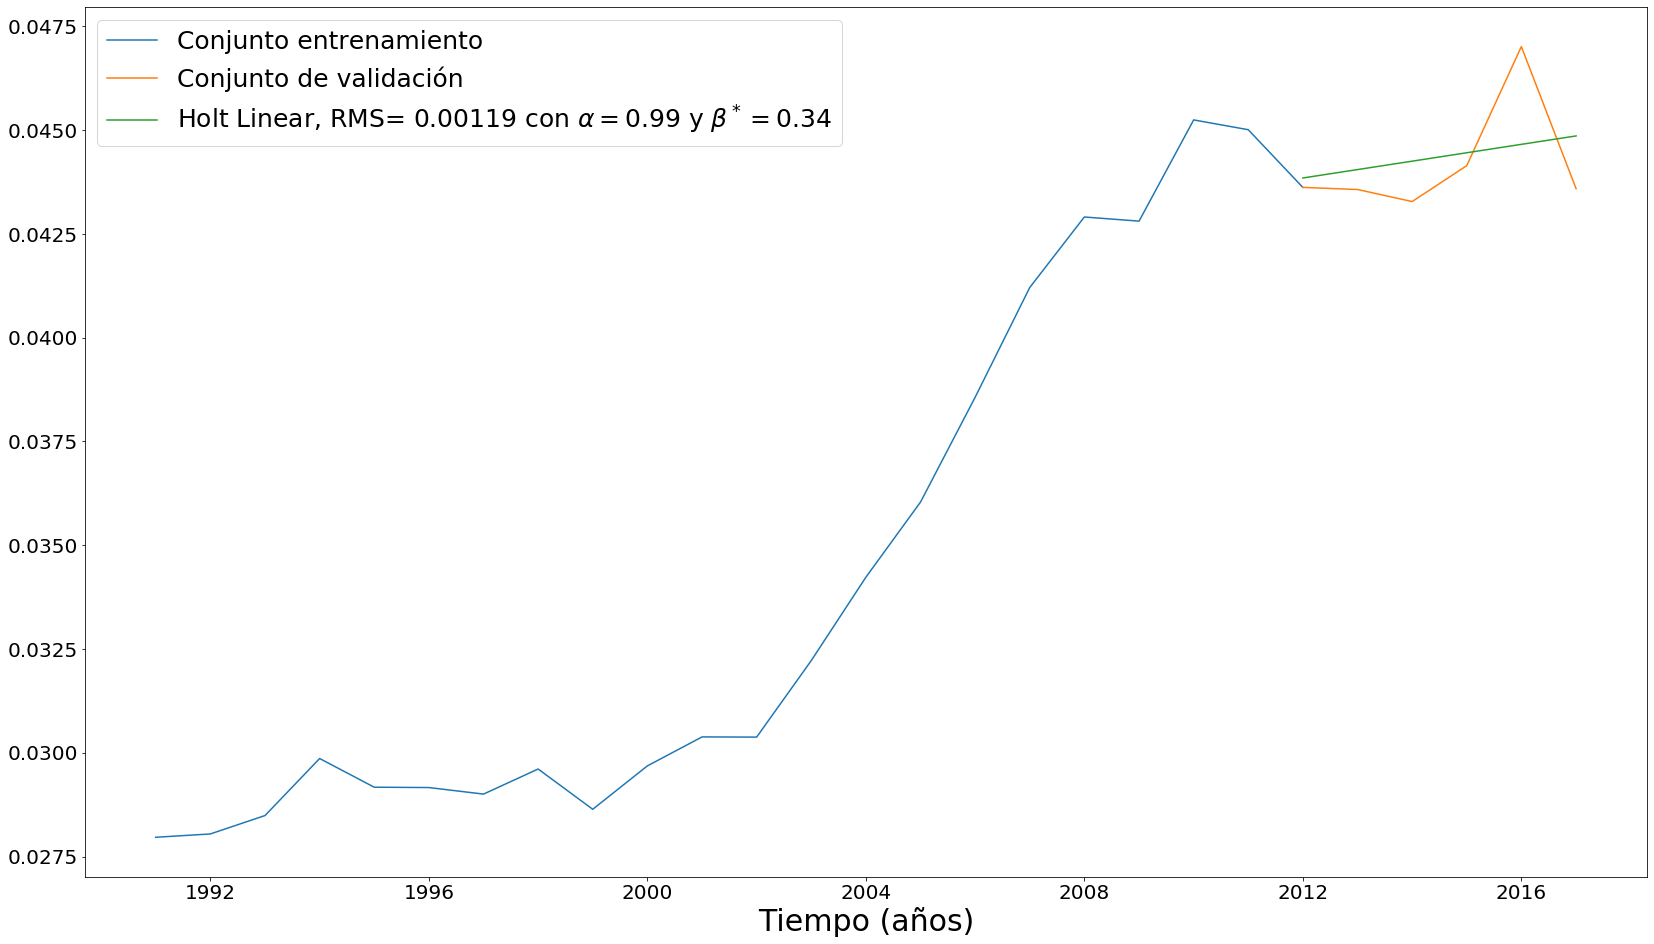

In [19]:
fit1 = Holt(np.asarray(train.consumo)).fit(smoothing_level = 0.99, smoothing_slope = 0.34)
valid['Holt_linear'] = fit1.forecast(len(valid))
rms = np.sqrt(MSE(valid.consumo, valid.Holt_linear))
plt.figure(figsize=(28, 16))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(train.consumo, label='Conjunto entrenamiento')
plt.plot(valid.consumo, label='Conjunto de validación')
plt.xlabel('Tiempo (años)', fontsize=30)
plt.plot(valid.Holt_linear, label=r'Holt Linear, RMS= %.5f con $\alpha = 0.99$ y $\beta^*=0.34$'%rms)
plt.legend(loc='best', fontsize=25)
plt.show()

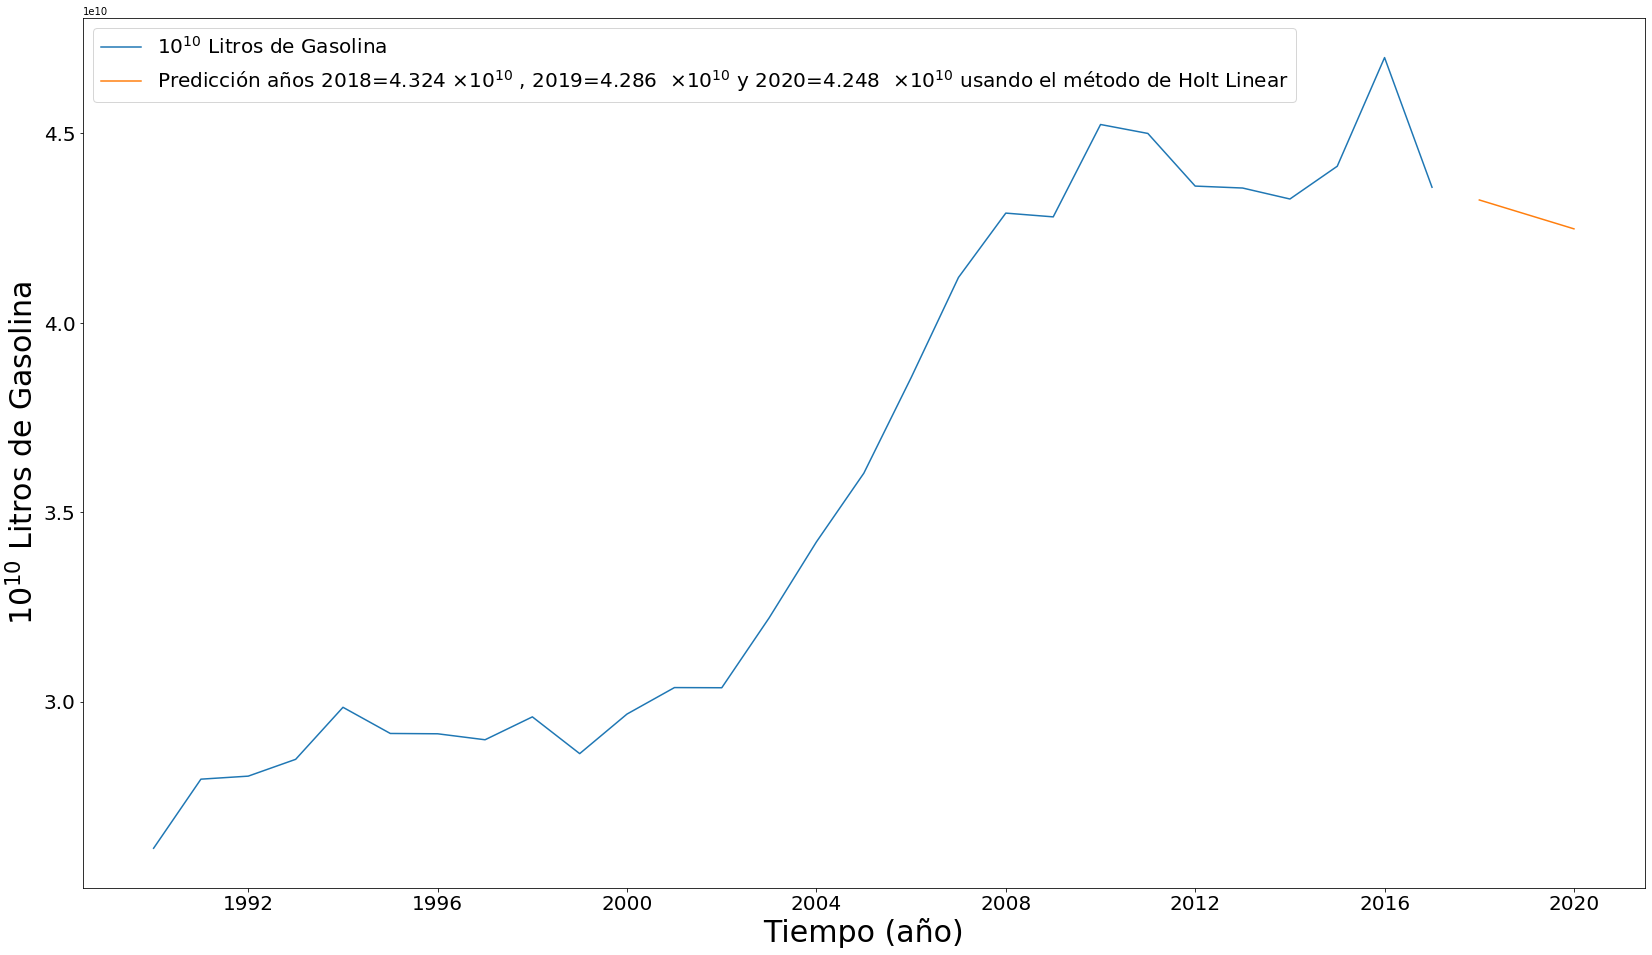

In [25]:
#prediciendo usando toda la serie como entrenamiento

fit1 = Holt(np.asarray(consumo_gasolina.consumo)).fit(smoothing_level = 0.99, smoothing_slope = 0.34)
fit1.forecast(len(consumo_gasolina.consumo))
pred_range = pd.date_range('2018','2020', freq ='YS')
forecast = pd.DataFrame(index=pred_range)
forecast['pred'] = fit1.forecast(3)

plt.figure(figsize=(28, 16))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(consumo_gasolina.consumo*10**9/34.78*np.sum(consumo_gasolina.consumo_copy.values), label='$10^{10}$ Litros de Gasolina')
plt.plot(forecast['pred']*(10**9/34.78)*np.sum(consumo_gasolina['consumo_copy']), label=r'Predicción años 2018=%.3f $\times 10^{10}$ , 2019=%.3f  $\times 10^{10}$ y 2020=%.3f  $\times 10^{10}$ usando el método de Holt Linear'
         %((forecast['pred']*(1/(34.78*10))*np.sum(consumo_gasolina['consumo_copy']))[0], (forecast['pred']*(1/(34.78*10))*np.sum(consumo_gasolina['consumo_copy']))[1], (forecast['pred']*(1/(34.78*10))*np.sum(consumo_gasolina['consumo_copy']))[2]))
plt.xlabel('Tiempo (año)', fontsize=30)
plt.ylabel('$10^{10}$ Litros de Gasolina', fontsize=30)
plt.legend(loc='best', fontsize=20)
#plt.title('Producción de gasolina - $10^{10}$ litros de gasolina - Prediciendo con toda la serie', fontsize=30)
plt.show()

In [76]:
extr = [consumo_gasolina.consumo[-1]].append(fit1.forecast(3))
print(extr)

None


In [40]:
prediction_time = pd.date_range('2012', '2020', freq='Y')
prediction_years = pd.DataFrame(index=prediction_time)
prediction_years['year'] = prediction_time.year

prediction_years['prediction'] = fit1.forecast(8)

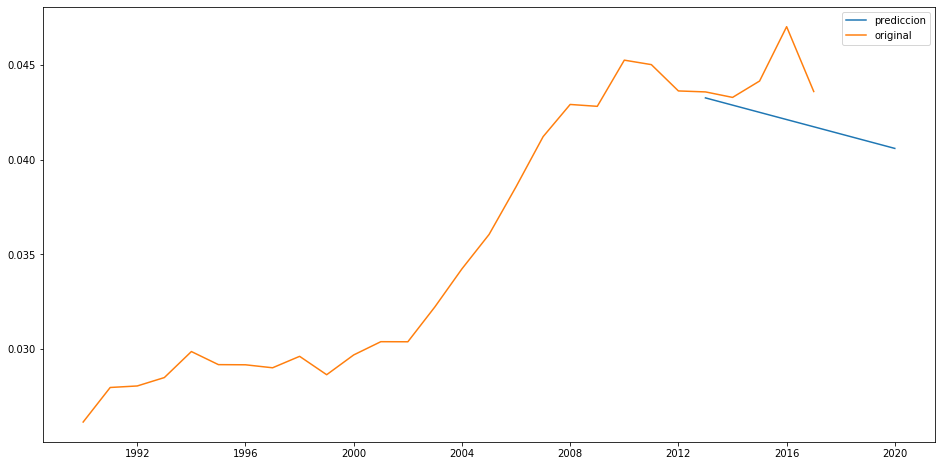

In [42]:
plt.figure(figsize=(16, 8))
plt.plot(prediction_years.prediction, label='prediccion')
plt.plot(consumo_gasolina.consumo, label='original')
plt.legend(loc='best')
plt.show()

Resultados de la prueba de Dickey Fuller:
Test Statistic                    -3.058923
p-value                            0.029746
#Lags usados                       7.000000
Numero de observaciones usados    19.000000
Valor critico (1%)                -3.832603
Valor critico (5%)                -3.031227
Valor critico (10%)               -2.655520
dtype: float64


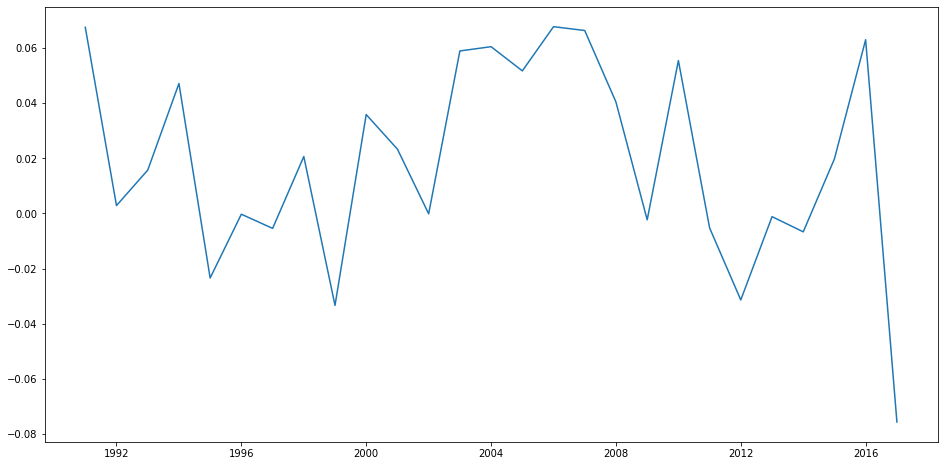

In [16]:
#haciendo la prueba de Dickey Fuller, se podrá aplicar ARIMA?
print('Resultados de la prueba de Dickey Fuller:')
tranf_series1 = ((consumo_gasolina.consumo)/consumo_gasolina.consumo.cumsum()).dropna()
tranf_series2 = (np.log(consumo_gasolina.consumo)-np.log(consumo_gasolina.consumo.shift(1))).dropna()
tranf_series = np.log(consumo_gasolina.consumo)


tranf_series_rolling = (consumo_gasolina.consumo-consumo_gasolina.consumo.rolling(window=6).mean()).dropna()

dftest = sm.tsa.stattools.adfuller(tranf_series2, autolag='AIC')
dfoutput = pd.Series(dftest[0: 4], index=['Test Statistic', 'p-value', '#Lags usados','Numero de observaciones usados'])
for key, value in dftest[4].items():
    dfoutput['Valor critico (%s)' %key] = value
print(dfoutput)

plt.figure(figsize=(16, 8))
plt.plot(tranf_series2)
plt.show()

In [17]:
#Separando la serie des-tendenciada en entrenamiento y validación
tranf_series_train = tranf_series.ix['1991': '2012']
tranf_series_val = tranf_series.ix['2012': '2017']

In [18]:
#Curvas ACF y PACF

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(tranf_series, nlags = 10)
lag_pacf = pacf(tranf_series, nlags=10, method='ols')

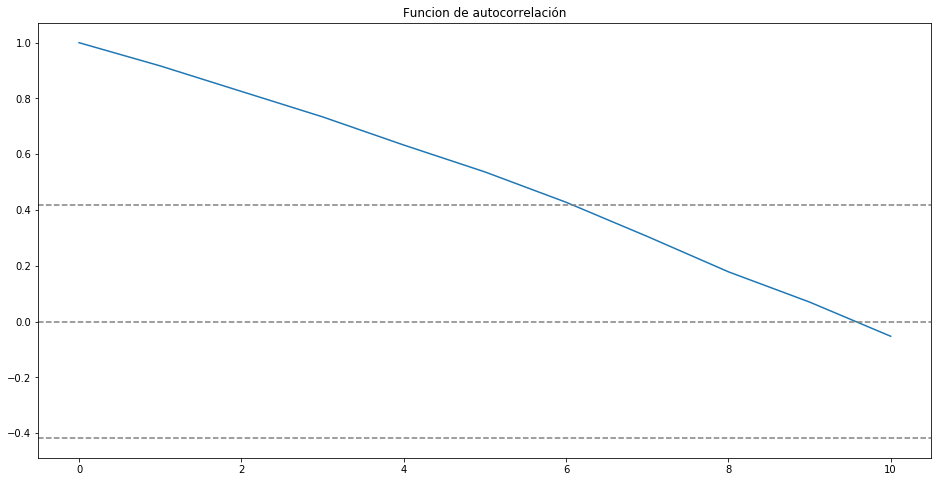

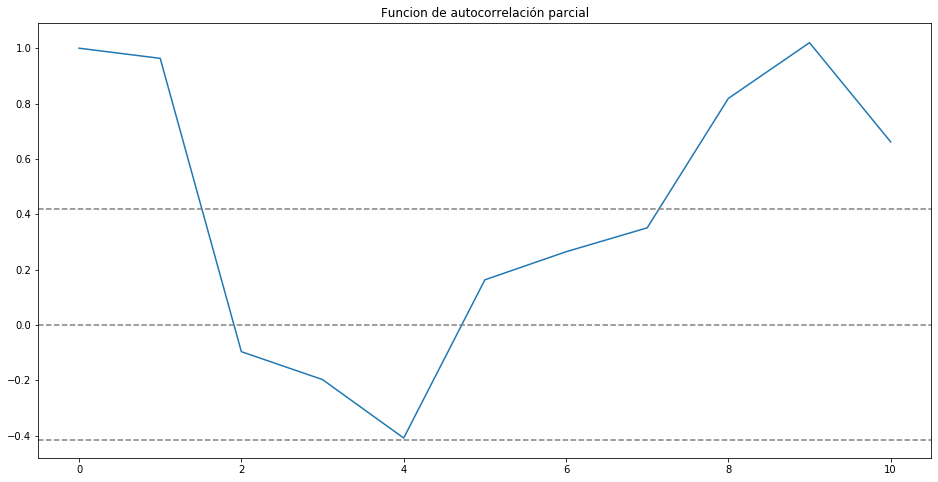

In [19]:
plt.figure(figsize=(16, 8))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.title('Funcion de autocorrelación')
plt.show()
plt.figure(figsize=(16, 8))

plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.title('Funcion de autocorrelación parcial')
plt.show()

c:\users\lance\downloads\software_pc\time_series_course\time_series_python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
c:\users\lance\downloads\software_pc\time_series_course\time_series_python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.consumo   No. Observations:                   21
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  43.011
Method:                       css-mle   S.D. of innovations              0.031
Date:                Thu, 14 Nov 2019   AIC                            -80.022
Time:                        19:51:29   BIC                            -76.888
Sample:                    01-01-1992   HQIC                           -79.342
                         - 01-01-2012                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0206      0.008      2.515      0.021       0.005       0.037
ma.L1.D.consumo     0.2108      0.205      1.028      0.317      -0.191       0.613
                                

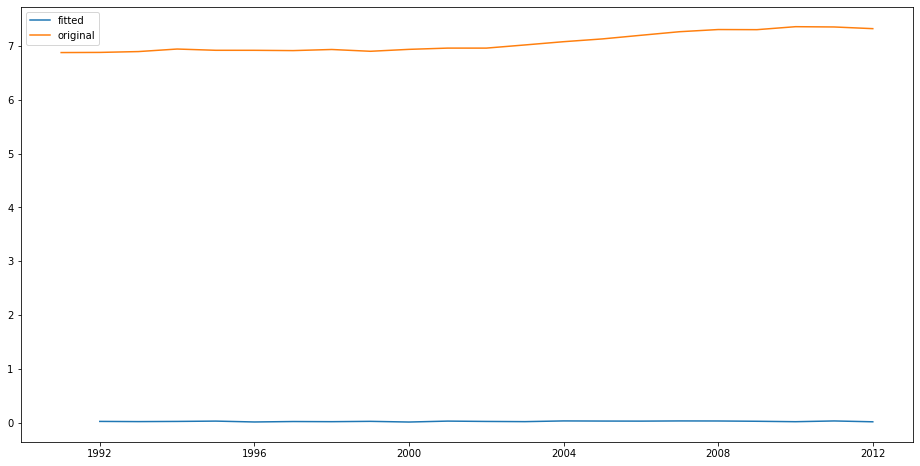

El error en el ajuste de la serie escalada es:  7.317855427974831


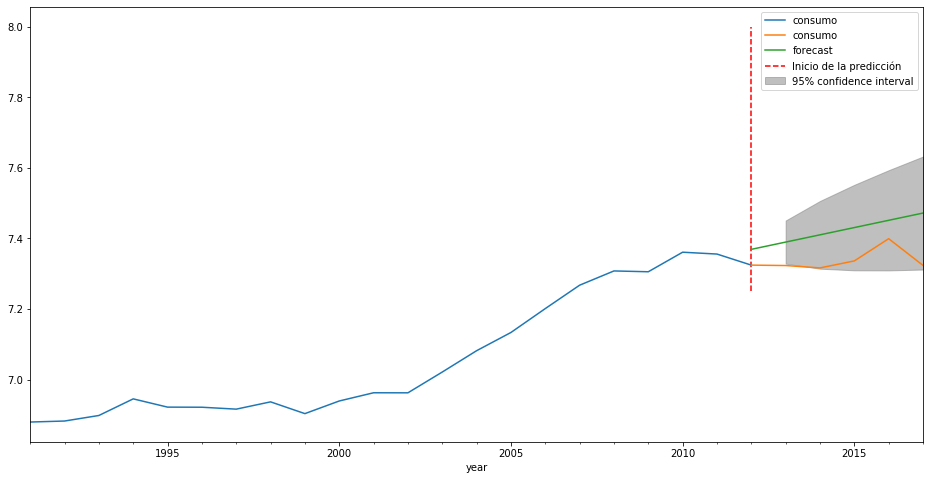

In [20]:
from statsmodels.tsa.arima_model import ARIMA

model_MA = ARIMA(tranf_series_train,order=(0,1,1))
fitted_MA = model_MA.fit()
print(fitted_MA.summary())

plt.figure(figsize=(16, 8))
plt.plot(fitted_MA.fittedvalues, label='fitted')
plt.plot(tranf_series_train, label='original')
#plt.plot(fitted_MA.resid.values, label='residuos')
plt.legend(loc='best')
plt.show()

fig, ax = plt.subplots(figsize=(16, 8))
tranf_series_train.plot(ax=ax)
tranf_series_val.plot(ax=ax)
ax.vlines('2012',7.25, 8, linestyle='--', color='r', label='Inicio de la predicción')

ax = fitted_MA.plot_predict(start='2012', end='2017', dynamic=True, plot_insample=False, ax=ax)

print('El error en el ajuste de la serie escalada es: ', np.sqrt(MSE(tranf_series_val, pd.DataFrame({'predicted' : fitted_MA.predict(start='2012', end='2017', dynamic=True).values}))))

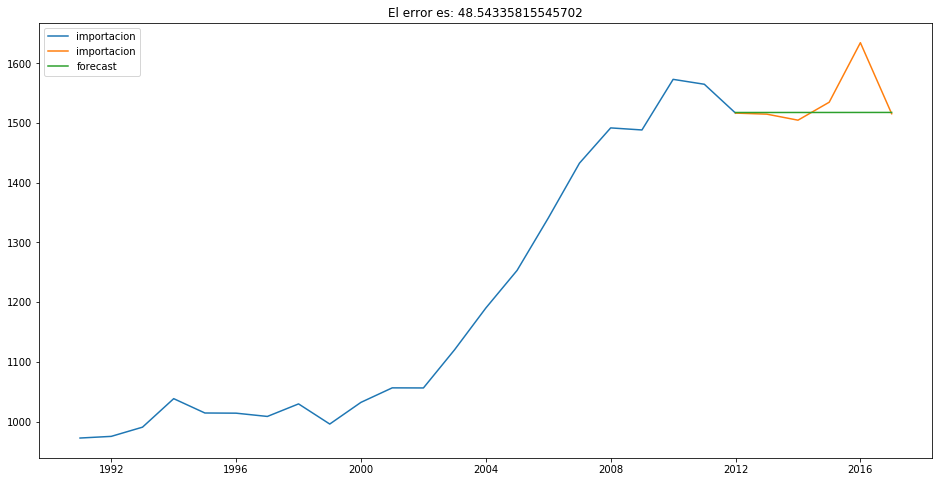

In [21]:
model_fitted = pd.DataFrame({'predicted' : fitted_MA.predict(start='2012', end='2017', dynamic=True).values})
model_fitted.index = fitted_MA.predict(start='2012', end='2017', dynamic=True).index
model_fitted = model_fitted.cumsum().shift().fillna(0)
model_fitted = np.exp(model_fitted).dropna().add(valid.consumo.iloc[0])

rme =np.sqrt(MSE(valid.consumo, model_fitted))


plt.figure(figsize=(16, 8))
plt.plot(train.consumo, label='importacion')
plt.plot(valid.consumo, label='importacion')
plt.plot(model_fitted, label='forecast')
plt.title('El error es: '+str(rme))
plt.legend(loc='best')
plt.show()